Used car sales analysis

This project is designed for the automobile industry. It is for those who sell used cars. I have acquired data on used cars. I have also built a model that learns from that data by analyzing the features of those cars. The model I created can predict how much a used car will see for based on the features of that car such as the company, te engine time, the amount of miles on the car, ect... This will help car dealers know how much a prospective car will sell for once the acquire it. The market for used cars is very subjective so it is likley the will find a car that they can acquire for less than the model predicts they can purchase it for, and then they can sell the car for the predicted price. I am confident in this perspective because our model has demonstrated a strong understanding of the data with the testing that I have done.

The Data

The data I used for this analysis is from Kaggle.com. It contains 973 entries of used cars. It tells there features and how much they sold for. There sales price was my target feature.
---------------------------------------------------------------------------------------------------------------------------------


Running my imports for Pandas, different models, my scaler, splitting the data, and matplot lib for doing data visualization

In [1]:
import numpy as np
import scipy.stats as stats
import sklearn
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Looking at the organization of my files with ls

In [3]:
ls


 data/  'Final Notebook Deliverable.ipynb'   README.md


Loading in the data file as a data frame with pandas

In [4]:
df = pd.read_csv('data/archive/FINAL_SPINNY_900.csv')

Looking at a preview of the data

In [5]:
df.head()

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,44611,1st,5,diesel,45,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,"6,57,000"
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,20305,1st,5,petrol,45,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,"6,82,000"
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,29540,2nd,5,petrol,40,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.50,BS IV,"7,93,000"
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,35680,1st,5,petrol,28,1.0L,999,5-Speed,Manual,67.00,91.00,21.70,BS IV,"4,14,000"
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,25126,1st,5,petrol,43,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.90,BS V,"5,15,000"


Looking at Emission values to potentialy change the to numerical values (int)

In [6]:
df["Emission"].value_counts()

BS IV     588
BS V      303
BS III     82
Name: Emission, dtype: int64

Looking at the values in price column

In [7]:
df['Price'].values

array(['6,57,000', '6,82,000', '7,93,000', '4,14,000', '5,15,000',
       '6,04,000', '3,16,000', '14,19,000', '7,10,000', '3,92,000',
       '6,13,000', '5,98,000', '9,69,000', '21,00,000', '6,66,000',
       '10,39,000', '8,58,000', '8,60,000', '6,80,000', '6,25,000',
       '5,67,000', '3,71,000', '10,76,000', '5,87,000', '3,96,000',
       '5,54,000', '9,84,000', '5,07,000', '5,86,000', '6,39,000',
       '2,37,000', '5,36,000', '4,56,000', '11,07,000', '5,71,000',
       '5,87,000', '6,29,000', '7,18,000', '3,96,000', '8,77,000',
       '7,74,000', '5,54,000', '8,29,000', '5,30,000', '3,67,000',
       '5,50,000', '6,60,000', '9,98,000', '10,12,000', '15,37,000',
       '9,08,000', '5,08,000', '4,17,000', '7,25,000', '9,80,000',
       '7,96,000', '4,35,000', '5,54,000', '4,81,000', '4,42,000',
       '5,30,000', '7,59,000', '4,55,000', '19,72,000', '11,38,000',
       '9,20,000', '17,42,000', '5,68,000', '4,19,000', '4,76,000',
       '5,77,000', '5,41,000', '7,30,000', '18,75,00

Removing commas from the values in the price column so i can convert them to numbers for numerical computations

when possible, I turn values in to floats or intergers so thats it is less columns, when i turn categorical features
into T/F values, it creates many more columns.

In [8]:
df['Price'] = df['Price'].str.replace(",","")

Removiving 'BS' from the values in Emission columns and converting roman numerals to interger values for
the same purpose.

In [9]:
df['Emission'] = df['Emission'].str.replace("BS","")

In [10]:
df['Emission'] = df['Emission'].str.replace("IV", "4")

In [11]:
df['Emission'] = df['Emission'].str.replace("III", "3")

In [12]:
df['Emission'] = df['Emission'].str.replace("V", "5")

Changing values in the No_of_Owners column to numerical values from the same purpuse

In [13]:
df['No_of_Owners'] = df['No_of_Owners'].str.replace("1st", "0")

In [14]:
df['No_of_Owners'] = df['No_of_Owners'].str.replace("2nd", "1")

In [15]:
df['No_of_Owners'] = df['No_of_Owners'].str.replace("3rd", "2")

Telling the computer that the following columns are int or float

In [16]:
df['Emission'] = df['Emission'].astype(int)

In [17]:
df['Price'] = df['Price'].astype(int)

In [18]:
df['Mileage(kmpl)'] = df['Mileage(kmpl)'].astype(float)

In [19]:
df["No_of_Owners"] = df['No_of_Owners'].astype(int)

Looking a types of values to complete my data prep

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car_Name               973 non-null    object 
 1   Make                   973 non-null    object 
 2   Model                  973 non-null    object 
 3   Make_Year              973 non-null    int64  
 4   Color                  973 non-null    object 
 5   Body_Type              973 non-null    object 
 6   Mileage_Run            973 non-null    int64  
 7   No_of_Owners           973 non-null    int64  
 8   Seating_Capacity       973 non-null    int64  
 9   Fuel_Type              973 non-null    object 
 10  Fuel_Tank_Capacity(L)  973 non-null    int64  
 11  Engine_Type            973 non-null    object 
 12  CC_Displacement        973 non-null    int64  
 13  Transmission           973 non-null    object 
 14  Transmission_Type      973 non-null    object 
 15  Power(

Looking at the distribution of values in the number of owners column

In [21]:
df['No_of_Owners'].value_counts()

0    816
1    153
2      4
Name: No_of_Owners, dtype: int64

Turning the catergorical variables into T/F values (columns with values of 1 or 0) which will be on scale with the numerical data

In [22]:
df_dummy = pd.get_dummies(df[['Car_Name', "Make", "Model", "Color", "Body_Type", "Fuel_Type", "Engine_Type", "Transmission", "Transmission_Type"]])

Looking at the beautiful dummy values I have made

In [23]:
df_dummy

,Car_Name_Chevrolet Beat [2009-2014] PS Petrol,Car_Name_Chevrolet Beat [2011-2014] LS Diesel,Car_Name_Chevrolet Beat [2014-2017] LS Diesel,Car_Name_Chevrolet Beat [2014-2017] LS Petrol,Car_Name_Chevrolet Cruze [2009-2017] LTZ AT,Car_Name_Datsun GO [2014-2019] T,Car_Name_Datsun Redi-GO [2015-2019] T (O),Car_Name_Ford EcoSport [2013-2015] Titanium 1.0L Ecoboost,Car_Name_Ford EcoSport [2013-2015] Titanium 1.5L TDCi,Car_Name_Ford EcoSport [2013-2015] Titanium 1.5L TDCi (Opt),...,Engine_Type_inline 4 cylinder petrol engine,Engine_Type_k14B VVT Engine,Engine_Type_mHawk Diesel Engine,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Automatic,Transmission_Type_Manual
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Dropping  categorical features from the dataframe

In [24]:
df.drop(columns=['Car_Name', "Make", "Model", "Color", "Body_Type", "Fuel_Type", "Engine_Type", "Transmission", "Transmission_Type"], inplace=True)

creating a variable for the target feature

In [25]:
df_price = df['Price']

looking at the variable for target feature

In [26]:
df_price

0       657000
1       682000
2       793000
3       414000
4       515000
        ...   
968     956000
969    1027000
970     736000
971     749000
972     691000
Name: Price, Length: 973, dtype: int64

re-organize the index column for the dataframe

In [27]:
df.drop('Price', axis=1,inplace=True)

In [28]:
# Here we are resetting the index of our price Dataframe to  adjust for standard scaler!
df_price = df_price.reset_index(drop=True)

In [29]:
df_price

0       657000
1       682000
2       793000
3       414000
4       515000
        ...   
968     956000
969    1027000
970     736000
971     749000
972     691000
Name: Price, Length: 973, dtype: int64

Calling on the data frame to look at it

In [30]:
df

,Make_Year,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Tank_Capacity(L),CC_Displacement,Power(BHP),Torque(Nm),Mileage(kmpl),Emission
0,2017,44611,0,5,45,1498,109.00,250.00,21.66,4
1,2016,20305,0,5,45,1197,82.00,115.00,17.19,5
2,2019,29540,1,5,40,1199,88.50,110.00,16.50,4
3,2017,35680,0,5,28,999,67.00,91.00,21.70,4
4,2017,25126,0,5,43,1197,81.86,113.75,18.90,5
...,...,...,...,...,...,...,...,...,...,...
968,2018,23869,0,5,43,1591,121.00,158.00,17.40,5
969,2019,14831,0,5,43,1591,121.00,158.00,17.40,5
970,2014,52846,0,5,43,1591,121.00,158.00,17.01,3
971,2020,28335,1,5,42,1499,98.96,215.00,18.50,5


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Year              973 non-null    int64  
 1   Mileage_Run            973 non-null    int64  
 2   No_of_Owners           973 non-null    int64  
 3   Seating_Capacity       973 non-null    int64  
 4   Fuel_Tank_Capacity(L)  973 non-null    int64  
 5   CC_Displacement        973 non-null    int64  
 6   Power(BHP)             973 non-null    float64
 7   Torque(Nm)             973 non-null    float64
 8   Mileage(kmpl)          973 non-null    float64
 9   Emission               973 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 76.1 KB


Instantiating the Standar Scaler and fitting our Data Frame to it

In [32]:
# Instantiating our StandardScalar Object
ss = StandardScaler()

ss.fit(df)

df_scaled = ss.transform(df)

In [33]:
# Turning our StandardScalar object back into a dataframe, with the same column names as before 
df_scaled_new = pd.DataFrame(df_scaled, columns=df.columns)

In [34]:
df_scaled_new

,Make_Year,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Tank_Capacity(L),CC_Displacement,Power(BHP),Torque(Nm),Mileage(kmpl),Emission
0,0.01,0.13,-0.43,-0.21,0.34,0.71,0.69,1.59,0.80,-0.39
1,-0.34,-0.87,-0.43,-0.21,0.34,-0.38,-0.36,-0.44,-0.87,1.32
2,0.72,-0.49,2.18,-0.21,-0.28,-0.37,-0.11,-0.51,-1.12,-0.39
3,0.01,-0.24,-0.43,-0.21,-1.77,-1.09,-0.95,-0.80,0.82,-0.39
4,0.01,-0.67,-0.43,-0.21,0.09,-0.38,-0.37,-0.46,-0.23,1.32
...,...,...,...,...,...,...,...,...,...,...
968,0.37,-0.73,-0.43,-0.21,0.09,1.05,1.15,0.21,-0.79,1.32
969,0.72,-1.10,-0.43,-0.21,0.09,1.05,1.15,0.21,-0.79,1.32
970,-1.05,0.46,-0.43,-0.21,0.09,1.05,1.15,0.21,-0.93,-2.09
971,1.08,-0.54,2.18,-0.21,-0.03,0.72,0.30,1.06,-0.38,1.32


Combining hte data frame of our categorical variables back into the data frame after turning them into T/F (1/0) Values

In [35]:
df1 = pd.concat([df_scaled_new,df_dummy, df_price], axis = 1)

Calling on the new dataframe we have created to make sure everything looks good

In [36]:
df1

,Make_Year,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Tank_Capacity(L),CC_Displacement,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,...,Engine_Type_k14B VVT Engine,Engine_Type_mHawk Diesel Engine,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Automatic,Transmission_Type_Manual,Price
0,0.01,0.13,-0.43,-0.21,0.34,0.71,0.69,1.59,0.80,-0.39,...,0,0,0,0,0,1,0,1,0,657000
1,-0.34,-0.87,-0.43,-0.21,0.34,-0.38,-0.36,-0.44,-0.87,1.32,...,0,0,0,1,0,0,0,0,1,682000
2,0.72,-0.49,2.18,-0.21,-0.28,-0.37,-0.11,-0.51,-1.12,-0.39,...,0,0,0,1,0,0,0,0,1,793000
3,0.01,-0.24,-0.43,-0.21,-1.77,-1.09,-0.95,-0.80,0.82,-0.39,...,0,0,0,1,0,0,0,0,1,414000
4,0.01,-0.67,-0.43,-0.21,0.09,-0.38,-0.37,-0.46,-0.23,1.32,...,0,0,0,1,0,0,0,0,1,515000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0.37,-0.73,-0.43,-0.21,0.09,1.05,1.15,0.21,-0.79,1.32,...,0,0,0,0,1,0,0,1,0,956000
969,0.72,-1.10,-0.43,-0.21,0.09,1.05,1.15,0.21,-0.79,1.32,...,0,0,0,0,1,0,0,1,0,1027000
970,-1.05,0.46,-0.43,-0.21,0.09,1.05,1.15,0.21,-0.93,-2.09,...,0,0,1,0,0,0,0,1,0,736000
971,1.08,-0.54,2.18,-0.21,-0.03,0.72,0.30,1.06,-0.38,1.32,...,0,0,0,1,0,0,0,1,0,749000


Creating variables for target feature and the data frame of other features in preparation for splitting
the data between training data and testing data

In [37]:
X = df1.drop('Price',axis=1)
y = df1['Price']

Splitting the data so that i have data to train the model and data to test the model with

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
                                                X,
                                                y,
                                                test_size=0.2,
                                                random_state=42)

Creating a linear regression model, fitting it with training data and testing it with a program and
cross validating it.

In [39]:
lr = LinearRegression()
scores_lr = cross_validate(
                    lr, X_train, y_train, cv=5, 
                    return_train_score=True)
print(f"""train scores: {scores_lr['train_score']},
      test scores: {scores_lr['test_score']}""")

train scores: [0.99418695 0.9940379  0.99345253 0.99313692 0.99383978],
      test scores: [-5.04688798e+20 -2.55921133e+23 -7.00188928e+23 -2.29411695e+23
 -3.23709413e+23]


Creating a decision tree regression model, fitting it with training data and testing it with a program and
cross validating it to see if it performs better

In [40]:
dtr = DecisionTreeRegressor()
scores_dtr = cross_validate(
                    dtr, X_train, y_train, cv=5, 
                    return_train_score=True)
print(f"""train scores: {scores_dtr['train_score']},
      test scores: {scores_dtr['test_score']}""")

train scores: [1. 1. 1. 1. 1.],
      test scores: [0.70883076 0.87323898 0.95108552 0.91280978 0.94218502]


I have decided to use a decision tree regressor model since it has performed better on the cross validation. 
Now i am making a dummy model that just uses the mean values to see my improvement in the model that i create

In [41]:
from sklearn.dummy import DummyRegressor as dr

In [42]:
dr1 = dr()

In [43]:
dr1.fit(X_train, y_train)

DummyRegressor()

Looking at the dummy regressors predictions to make sure that it worked

In [44]:
dr1.predict(X_train)

array([745221.07969152, 745221.07969152, 745221.07969152, 745221.07969152,
       745221.07969152, 745221.07969152, 745221.07969152, 745221.07969152,
       745221.07969152, 745221.07969152, 745221.07969152, 745221.07969152,
       745221.07969152, 745221.07969152, 745221.07969152, 745221.07969152,
       745221.07969152, 745221.07969152, 745221.07969152, 745221.07969152,
       745221.07969152, 745221.07969152, 745221.07969152, 745221.07969152,
       745221.07969152, 745221.07969152, 745221.07969152, 745221.07969152,
       745221.07969152, 745221.07969152, 745221.07969152, 745221.07969152,
       745221.07969152, 745221.07969152, 745221.07969152, 745221.07969152,
       745221.07969152, 745221.07969152, 745221.07969152, 745221.07969152,
       745221.07969152, 745221.07969152, 745221.07969152, 745221.07969152,
       745221.07969152, 745221.07969152, 745221.07969152, 745221.07969152,
       745221.07969152, 745221.07969152, 745221.07969152, 745221.07969152,
       745221.07969152, 7

Getting a preformace score with the dummy model to analyze the improvement of my modeling

In [45]:
dr1.score(X_train,y_train)

0.0

Creating my grid, which are the different options i can implement as my parameters for my DecisionTree Regressor
Model.

In [46]:
grid = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'splitter' : ['best', 'random'], 'min_samples_split' : [2,5,7]  }

Performing a GridSearch. The computer is running the data through a decision tree model with every possible combination of the grid parameters. It will also cross validate each time and return the parameters that create the best score.

In [47]:
gs= GridSearchCV(dtr, grid, verbose=3, n_jobs=-2)

In [48]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-2)]: Done 120 out of 120 | elapsed:    1.9s finished


GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-2,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'min_samples_split': [2, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=3)

Here I pull the best parameters from the Grid Search

In [49]:
gs.best_params_

{'criterion': 'friedman_mse', 'min_samples_split': 2, 'splitter': 'random'}

Creating a Model with the best parameters that I pulled from the grid search

In [50]:
best_dtr = DecisionTreeRegressor(criterion= 'friedman_mse', min_samples_split =  7, splitter= 'best')

Cross Validating this model to see the improvement from the baseline model

In [51]:
scores_best_dtr = cross_validate(
                    best_dtr, X_train, y_train, cv=5, 
                    return_train_score=True)
print(f"""train scores: {scores_best_dtr['train_score']},
      test scores: {scores_best_dtr['test_score']}""")

train scores: [0.99229683 0.99320439 0.9906468  0.99214798 0.99060832],
      test scores: [0.69667163 0.89151329 0.84121955 0.92999236 0.94872381]


Fitting the training data to my new model

In [52]:
best_dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', min_samples_split=7)

In [65]:
best_dtr.feature_importances_

array([1.20974681e-01, 9.21614341e-03, 4.20785715e-04, 2.04994635e-03,
       6.95333442e-02, 1.94516609e-03, 7.05322891e-01, 1.23530670e-02,
       1.11805300e-02, 3.30535801e-05, 2.99253151e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.31373066e-06, 4.60403303e-04, 0.00000000e+00,
       3.59090252e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

Predicting the sales price of the cars in the test set

In [53]:
y_pred = best_dtr.predict(X_test)
y_pred

array([ 347833.33333333,  465833.33333333,  521000.        ,
        662000.        , 1900000.        , 1207750.        ,
        426500.        ,  538833.33333333,  540000.        ,
       1576000.        ,  680600.        ,  607200.        ,
       1314000.        ,  810600.        ,  636000.        ,
        792333.33333333,  680200.        ,  894666.66666667,
        290000.        ,  307000.        , 1085000.        ,
        490500.        ,  946166.66666667,  484333.33333333,
        782800.        ,  562000.        , 1051000.        ,
        339400.        ,  820000.        ,  423000.        ,
        635500.        ,  287500.        ,  437000.        ,
        749000.        ,  763500.        ,  749000.        ,
        776600.        ,  435000.        ,  608400.        ,
        426500.        ,  626666.66666667,  439000.        ,
        334500.        , 1092000.        , 1047000.        ,
        914000.        ,  538833.33333333,  569200.        ,
       1424000.        ,

Comparing the predicted prices with the actual sales prices of the cars in our test set

In [54]:
Comparison_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred, 'Percentage Difference':abs(y_test-y_pred)/y_test * 100})
Comparison_df.tail()

,Real Values,Predicted Values,Percentage Difference
578,485000,514000.00,5.98
327,498000,539000.00,8.23
878,617000,713500.00,15.64
849,430000,483666.67,12.48
801,454000,427000.00,5.95


Looking at the average difference in percetange of the predicted vs actual value of the sales price.

In [55]:
sum(Comparison_df['Percentage Difference'].values)/len(Comparison_df['Percentage Difference'].values)

8.54653981129209

scattering cars index and their price, while plotting the predicted price over them

In [70]:
X_test.index

Int64Index([199, 538, 174, 464,  66, 424, 718, 346, 281, 158,
            ...
            580, 453,  49, 707, 618, 578, 327, 878, 849, 801],
           dtype='int64', length=195)

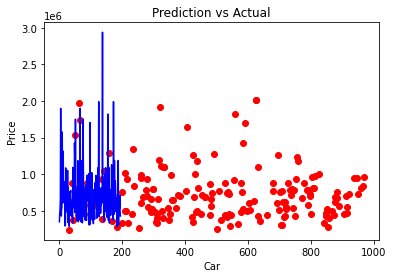

In [82]:
plt.scatter(X_test.index, y_test, color = 'red')
plt.plot(best_dtr.predict(X_test), color = 'blue')
plt.title('Prediction vs Actual')
plt.xlabel('Car')
plt.ylabel('Price')
plt.show()